In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 전처리 연습

## 1. MinMaxScaler

### 데이터 확인

In [9]:
train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_test.csv')

In [10]:
display(train.head(3))
display(test.head(3))

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
0,0,Female,Loyal Customer,54,Personal Travel,Eco,1068,3,4,3,...,5,5,3,5,3,5,3,47,22.0,NaN
1,2,Male,Loyal Customer,20,Personal Travel,Eco,1546,4,4,4,...,4,3,3,4,4,4,4,5,2.0,NaN
2,3,Male,Loyal Customer,59,Business travel,Business,2962,0,4,0,...,1,1,1,1,5,1,4,54,46.0,NaN


,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
0,1,Male,Loyal Customer,28,Business travel,Business,3414,2,2,2,...,2,4,5,4,4,4,2,0,0.0,40819.0
1,16,Female,disloyal Customer,34,Business travel,Eco,2556,1,1,1,...,2,5,1,5,1,3,2,15,0.0,33335.0
2,17,Female,Loyal Customer,23,Personal Travel,Eco,363,2,5,2,...,5,3,2,4,5,4,5,0,0.0,20749.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

- **비행 탑승 만족도에 대한 데이터로서, 데이터 타입 대부분 int로 확인되지만 만족도 평가 지표라면 범주형일 가능성. 확인 필요.**

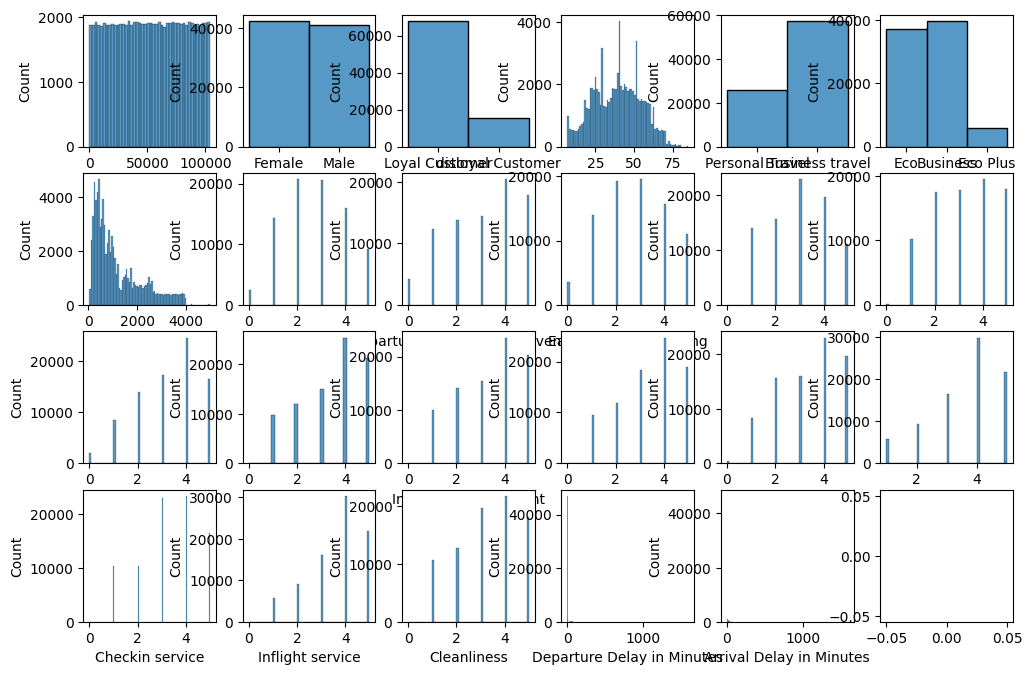

In [11]:
plt.figure(figsize = (12,12))

for i, col in enumerate(train.columns):
    ax = plt.subplot(6, 6, i+1)
    sns.histplot(x = str(col), data = train)
plt.show()

- **연속형 수치 변수와 범주형 변수 나눠서 다루기**
- **이전에, 데이터 컬럼 이름을 타이핑 하게 좋게 바꿔주면 내가 편하다**

In [12]:
train = train.rename(columns={'ID': 'customer_id'})
test = test.rename(columns={'ID': 'customer_id'})

In [13]:
train.rename(lambda x: x.lower().strip().replace(' ', '_'), axis = 'columns', inplace =True)
test.rename(lambda x: x.lower().strip().replace(' ', '_'), axis = 'columns', inplace =True)

display(train.head(2))
display(test.head(2))

,customer_id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,id
0,0,Female,Loyal Customer,54,Personal Travel,Eco,1068,3,4,3,...,5,5,3,5,3,5,3,47,22.0,NaN
1,2,Male,Loyal Customer,20,Personal Travel,Eco,1546,4,4,4,...,4,3,3,4,4,4,4,5,2.0,NaN


,customer_id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,id
0,1,Male,Loyal Customer,28,Business travel,Business,3414,2,2,2,...,2,4,5,4,4,4,2,0,0.0,40819.0
1,16,Female,disloyal Customer,34,Business travel,Eco,2556,1,1,1,...,2,5,1,5,1,3,2,15,0.0,33335.0


In [14]:
obIdx = train.columns[[0, 1,2,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
numIdx = train.columns.difference(obIdx)

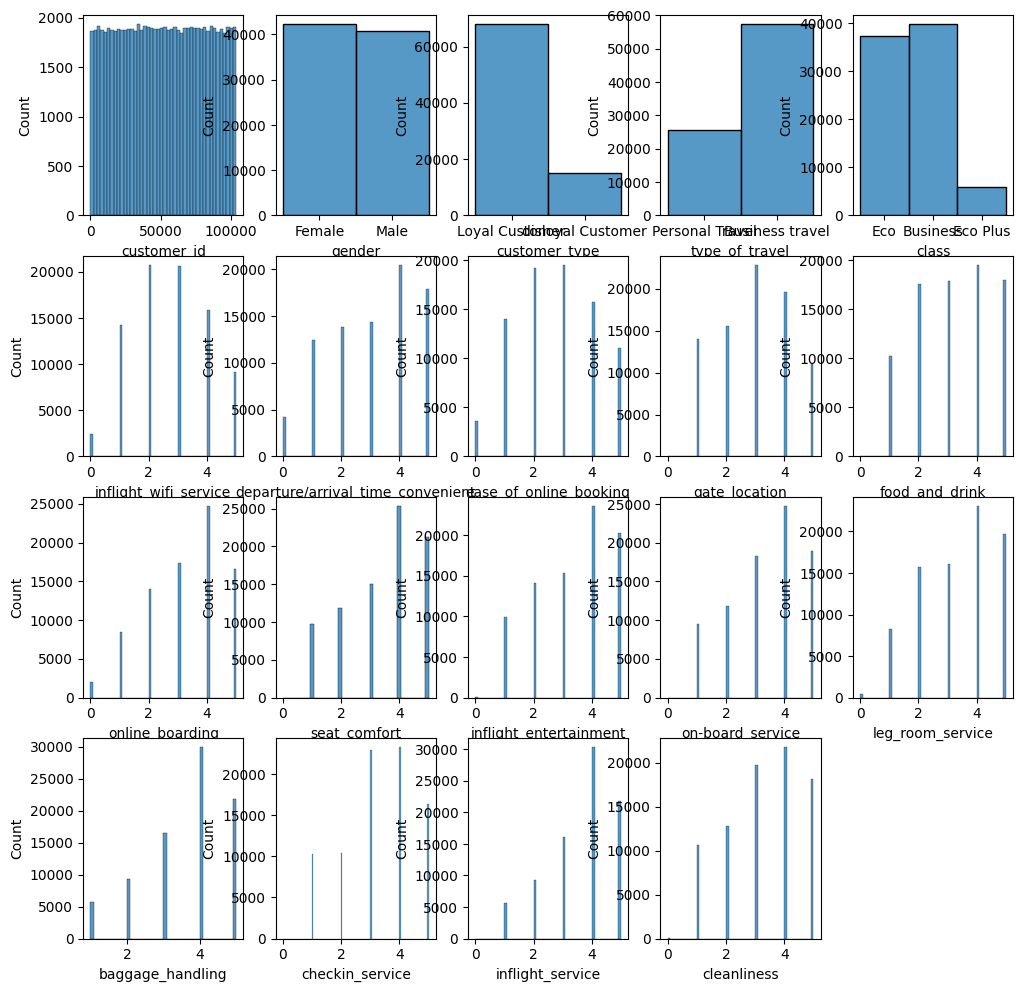

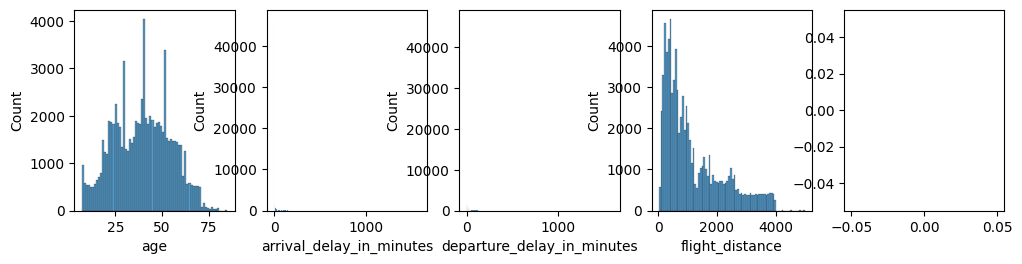

In [17]:
plt.figure(figsize = (12,12))
for i, col in enumerate(obIdx):
    ax = plt.subplot(4, 5, i+1)
    sns.histplot(x = str(col), data = train)
plt.show()


plt.figure(figsize = (12,12))
for i, col in enumerate(numIdx):
    ax = plt.subplot(4, 5, i+1)
    sns.histplot(x = str(col), data = train)
plt.show()

### MinMaxScaler - ScikitLearn 활용

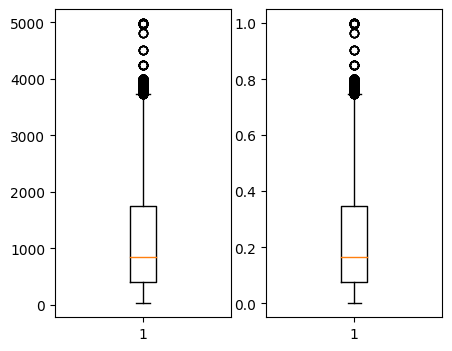

In [19]:
from sklearn.preprocessing import MinMaxScaler

# flight_distance에 대한 스케일링 진행
mm = MinMaxScaler()
mm.fit(train['flight_distance'].values.reshape(-1,1))
train['flight_distance_scailing'] = mm.transform(train['flight_distance'].values.reshape(-1,1))

# 스케일링 확인
fd = ['flight_distance', 'flight_distance_scailing']

plt.figure(figsize=(5,4))
for i, col in enumerate(fd):
    ax = plt.subplot(1, 2, i+1)
    plt.boxplot(x=str(col), data=train)
plt.show()

In [21]:
mm = MinMaxScaler()
train['flight_distance_scailing_2'] = mm.fit_transform(train['flight_distance'].values.reshape(-1,1))

display(train[['flight_distance', 'flight_distance_scailing','flight_distance_scailing_2']].head(2))

,flight_distance,flight_distance_scailing,flight_distance_scailing_2
0,1068,0.209410,0.209410
1,1546,0.305937,0.305937


In [28]:
mm = MinMaxScaler()
train['age_mms'] = mm.fit_transform(train['age'].values.reshape(-1,1))
test['age_mms'] = mm.fit_transform(test['age'].values.reshape(-1,1))

display(train[['customer_id','age', 'age_mms']].head(3))
display(test[['customer_id', 'age', 'age_mms']].head(3))

,customer_id,age,age_mms
0,0,54,0.602564
1,2,20,0.166667
2,3,59,0.666667


,customer_id,age,age_mms
0,1,28,0.269231
1,16,34,0.346154
2,17,23,0.205128


### MinMaxScaler - Pandas 활용

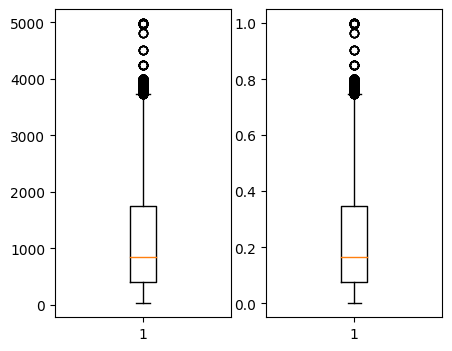

In [23]:
scailing = (train['flight_distance'] - train['flight_distance'].min()) / (train['flight_distance'].max() - train['flight_distance'].min())
train['flight_distance_scailing_3'] = scailing

fd = ['flight_distance', 'flight_distance_scailing_3']

plt.figure(figsize = (5,4))
for i, col in enumerate(fd):
    ax = plt.subplot(1, 2, i+1)
    plt.boxplot(x = str(col), data = train)
plt.show()

## 2. StandardScaler

### Pandas 활용

In [33]:
train['age_sspd'] = (train['age'] - train['age'].mean()) / (train['age'].std())

display(train[['customer_id', 'age', 'age_mms', 'age_sspd']].head(3))

,customer_id,age,age_mms,age_sspd
0,0,54,0.602564,0.969360
1,2,20,0.166667,-1.281924
2,3,59,0.666667,1.300431


### ScikitLearn 활용

In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train['age_ss'] = ss.fit_transform(train['age'].values.reshape(-1,1))

display(train[['customer_id', 'age', 'age_mms', 'age_sspd', 'age_ss']].head(3))

,customer_id,age,age_mms,age_sspd,age_ss
0,0,54,0.602564,0.969360,0.969366
1,2,20,0.166667,-1.281924,-1.281932
2,3,59,0.666667,1.300431,1.300439


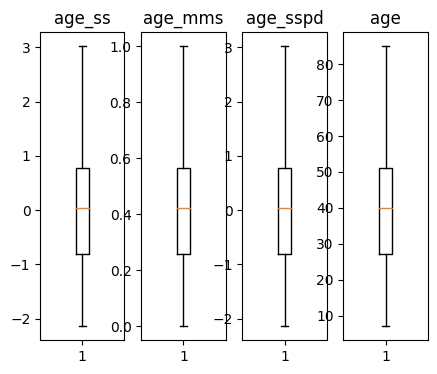

In [35]:
ages = ['age_ss', 'age_mms', 'age_sspd', 'age']

plt.figure(figsize = (5,4))
for i, col in enumerate(ages):
    ax = plt.subplot(1, 4, i+1)
    plt.boxplot(x = str(col), data = train)
    plt.title(col)
plt.show()

## 3. LabelScaler

### 데이터 확인

In [49]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(iris.target_names)

LabelEncoder()

In [51]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [52]:
le.transform(['setosa', 'versicolor', 'versicolor', 'virginica'])

array([0, 1, 1, 2])

In [53]:
le.inverse_transform([1, 1, 1, 0, 1, 2, 1, 0])

array(['versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa'], dtype='<U10')

In [54]:
df['species'] = le.inverse_transform(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 4. OneHotEncoder

### 데이터 확인

In [55]:
df = pd.read_csv('HearDisease/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [56]:
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis = 'columns', inplace = True)

In [58]:
df['heart_disease'] = np.where(df['heart_disease'] == 'Presence', 1, 0)

In [59]:
df.head()

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      270 non-null    int64  
 1   sex                      270 non-null    int64  
 2   chest_pain_type          270 non-null    int64  
 3   bp                       270 non-null    int64  
 4   cholesterol              270 non-null    int64  
 5   fbs_over_120             270 non-null    int64  
 6   ekg_results              270 non-null    int64  
 7   max_hr                   270 non-null    int64  
 8   exercise_angina          270 non-null    int64  
 9   st_depression            270 non-null    float64
 10  slope_of_st              270 non-null    int64  
 11  number_of_vessels_fluro  270 non-null    int64  
 12  thallium                 270 non-null    int64  
 13  heart_disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

- **전부 int. 확인 필요**

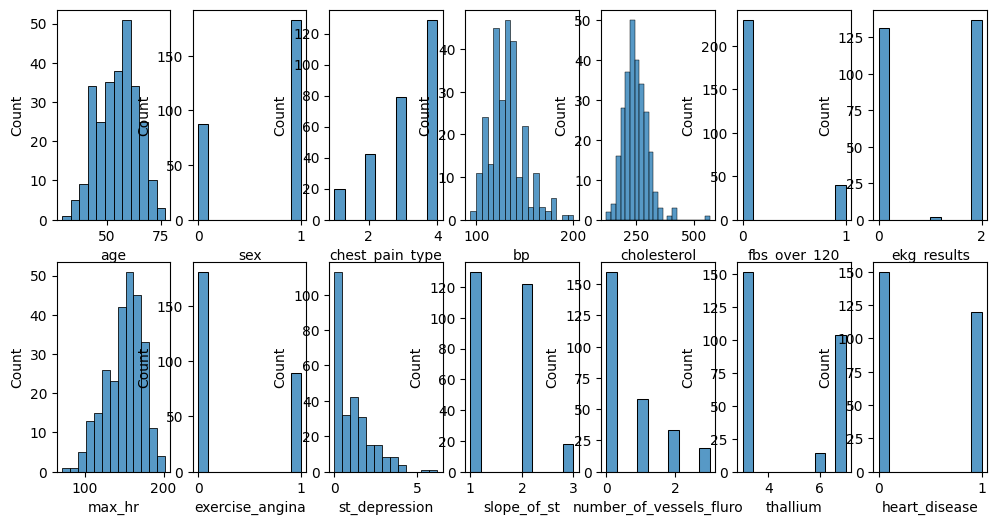

In [66]:
plt.figure(figsize = (12,6))
for i, col in enumerate(df.columns):
    ax = plt.subplot(2,7,i+1)
    sns.histplot(x = str(col), data = df)
plt.show()

In [69]:
ob_index = df.columns[[1,2,5,6,8,10,11,12]]
num_index = df.columns.difference(ob_index)
ob_index = list(ob_index)
num_index = list(num_index)

In [70]:
num_index.remove('heart_disease')

In [71]:
X = df.drop(['heart_disease'], axis = 1)
y = df[['heart_disease']]

### OneHotEncoder, StandardScaler

In [73]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
trans = [('ob', OneHotEncoder(handle_unknown = 'ignore'), ob_index), ('num', StandardScaler(), num_index)]
col_transformer = ColumnTransformer(transformers = trans)
X_std = col_transformer.fit_transform(X)

In [74]:
X_std

array([[ 0.        ,  1.        ,  0.        , ...,  1.40221232,
        -1.75920811,  1.18101235],
       [ 1.        ,  0.        ,  0.        , ...,  6.0930045 ,
         0.44640927,  0.48115318],
       [ 0.        ,  1.        ,  0.        , ...,  0.21982255,
        -0.37529132, -0.65611797],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.85947603,
         0.14367747,  0.21870599],
       [ 0.        ,  1.        ,  0.        , ..., -1.11763472,
        -0.07255953, -0.56863558],
       [ 0.        ,  1.        ,  0.        , ...,  0.70440852,
        -1.80245551,  0.39367078]])